In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
from tqdm import tqdm
import operator

sns.set()

%matplotlib inline

In [26]:
def location_heat_map(channel, topic):    
    all_files = glob.glob('processed_data/%s/*.p'%channel)
    locs = []
    for file in all_files:
        data = pickle.load(open(file, 'rb'))
        for key in data.keys():
            if topic in data[key]['Topics']:
                if data[key]['locations'] is not None:
                    locs.extend(data[key]['locations'])
    locations = np.zeros((len(locs), 2))
    counter = 0
    for l in locs:
        locations[counter, 0] = (l[0] + l[2])/2
        locations[counter, 1] = (l[1] + l[3])/2
        counter += 1
    plt.figure(figsize=(4, 4))
    idx = np.random.choice(len(locs), 5000)
    sns.kdeplot(locations[idx, :], cmap="Blues", shade=True, shade_lowest=False)
    plt.title(channel + " " + topic)
    return locations

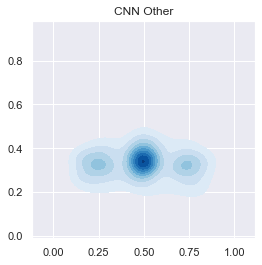

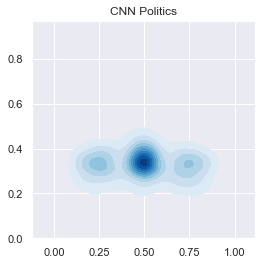

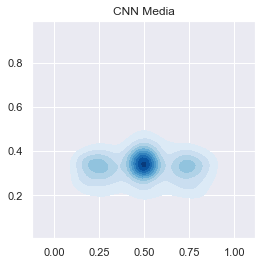

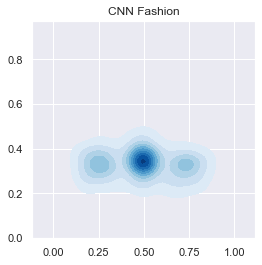

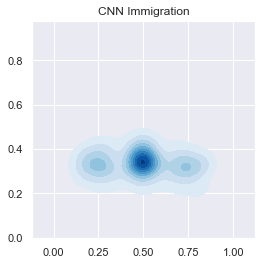

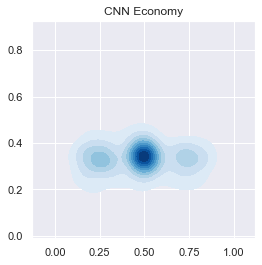

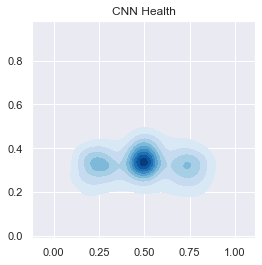

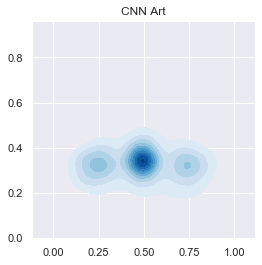

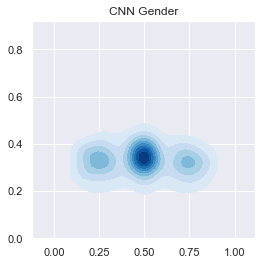

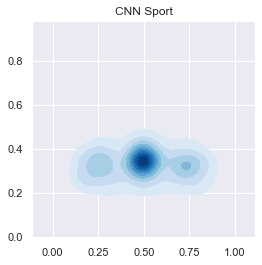

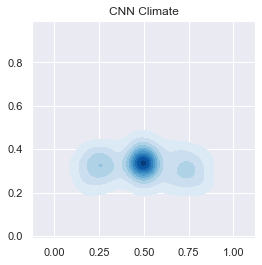

In [28]:
for topic in ['Other', 'Politics', 'Media', 'Fashion', 'Immigration', 
     'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Climate']:
    location_heat_map('CNN', topic)

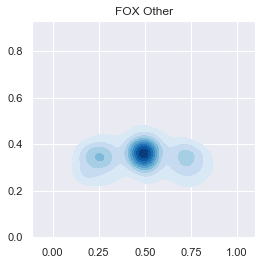

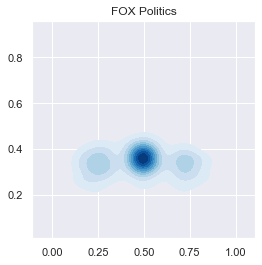

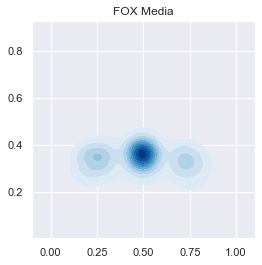

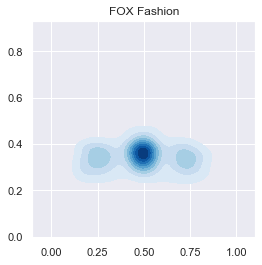

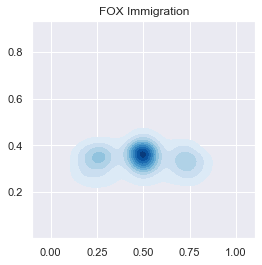

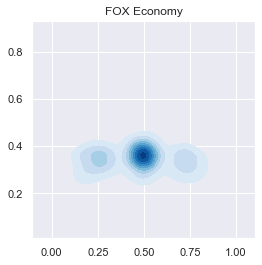

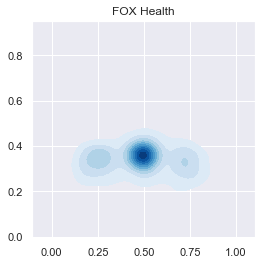

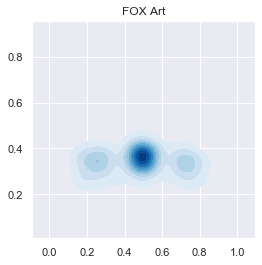

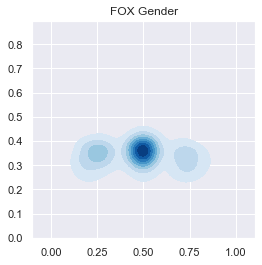

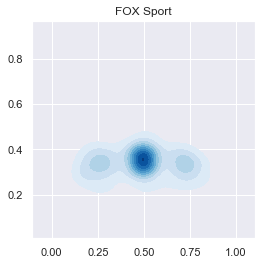

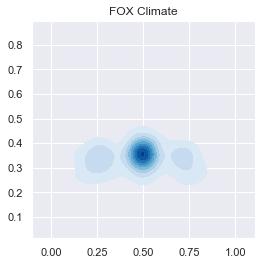

In [29]:
for topic in ['Other', 'Politics', 'Media', 'Fashion', 'Immigration', 
     'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Climate']:
    location_heat_map('FOX', topic)

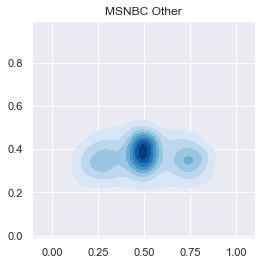

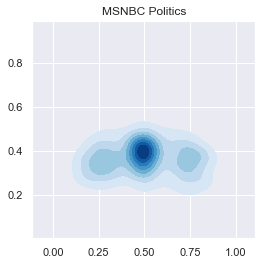

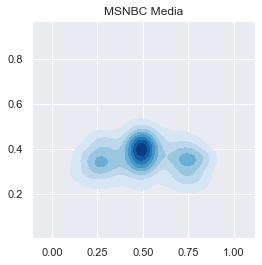

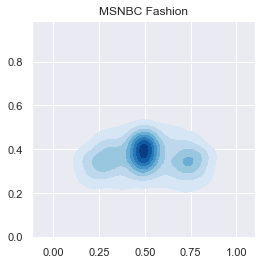

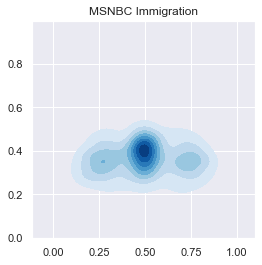

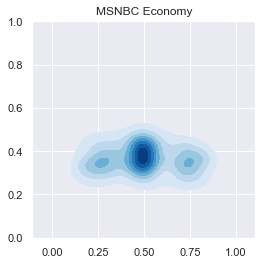

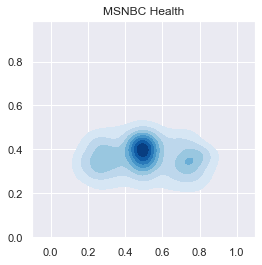

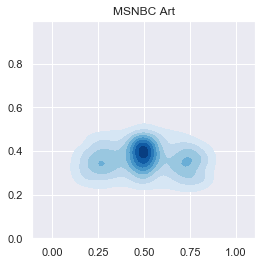

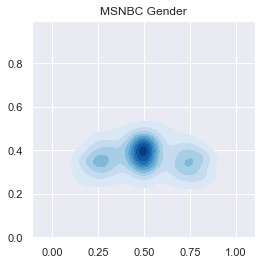

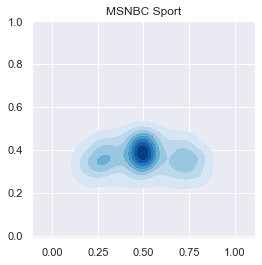

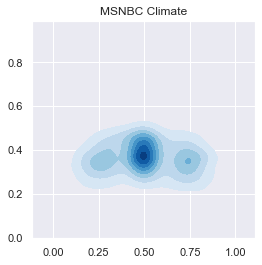

In [30]:
for topic in ['Other', 'Politics', 'Media', 'Fashion', 'Immigration', 
     'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Climate']:
    location_heat_map('MSNBC', topic)

In [41]:
def location_heat_map_person(channel, person):    
    all_files = glob.glob('processed_data/%s/*.p'%channel)
    locs = []
    for file in all_files:
        data = pickle.load(open(file, 'rb'))
        for key in data.keys():
            if data[key]['persons'] is None:
                continue
            if person in data[key]['persons']:
                if data[key]['locations'] is not None:
                    locs.extend(data[key]['locations'])
    locations = np.zeros((len(locs), 2))
    counter = 0
    for l in locs:
        locations[counter, 0] = (l[0] + l[2])/2
        locations[counter, 1] = (l[1] + l[3])/2
        counter += 1
    #idx = np.random.choice(len(locs), 5000)
    sns.kdeplot(locations, cmap="Blues")
    plt.title(channel + " " + person)
    return locations

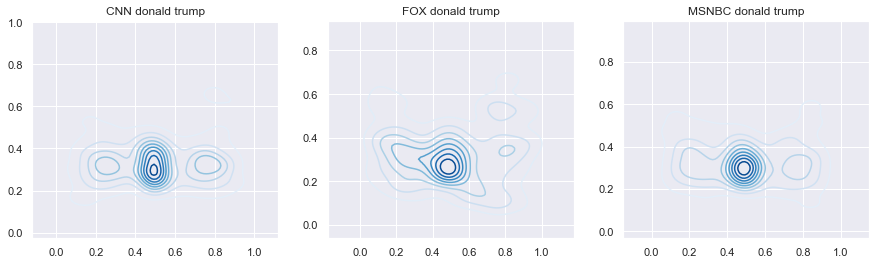

In [43]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
location_heat_map_person("CNN", "donald trump");
plt.subplot(1,3,2)
location_heat_map_person("FOX", "donald trump");
plt.subplot(1,3,3)
location_heat_map_person("MSNBC", "donald trump");

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


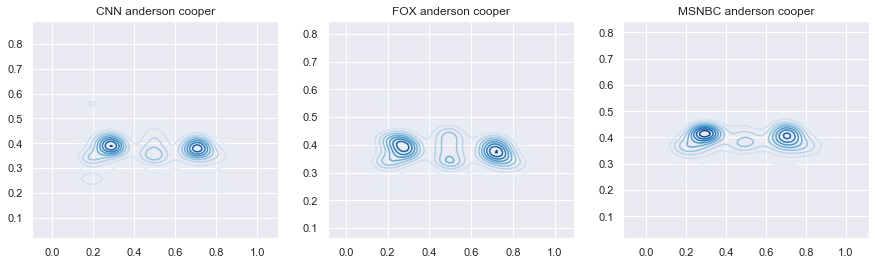

In [45]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
location_heat_map_person("CNN", "anderson cooper");
plt.subplot(1,3,2)
location_heat_map_person("FOX", "anderson cooper");
plt.subplot(1,3,3)
location_heat_map_person("MSNBC", "anderson cooper");

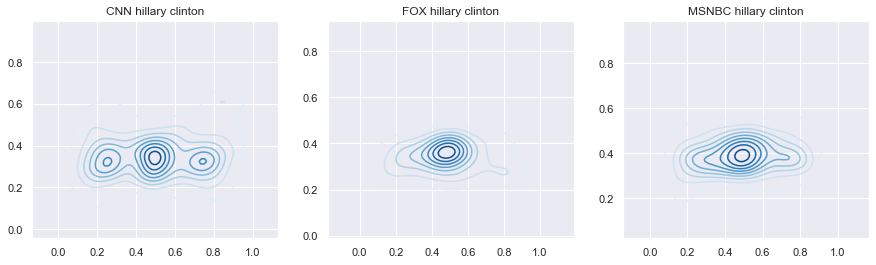

In [46]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
location_heat_map_person("CNN", "hillary clinton");
plt.subplot(1,3,2)
location_heat_map_person("FOX", "hillary clinton");
plt.subplot(1,3,3)
location_heat_map_person("MSNBC", "hillary clinton");

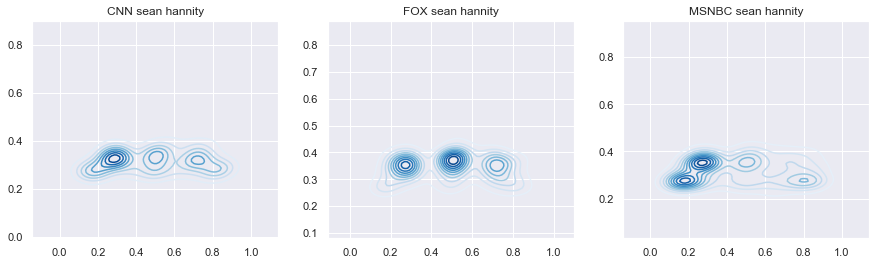

In [47]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
location_heat_map_person("CNN", "sean hannity");
plt.subplot(1,3,2)
location_heat_map_person("FOX", "sean hannity");
plt.subplot(1,3,3)
location_heat_map_person("MSNBC", "sean hannity");

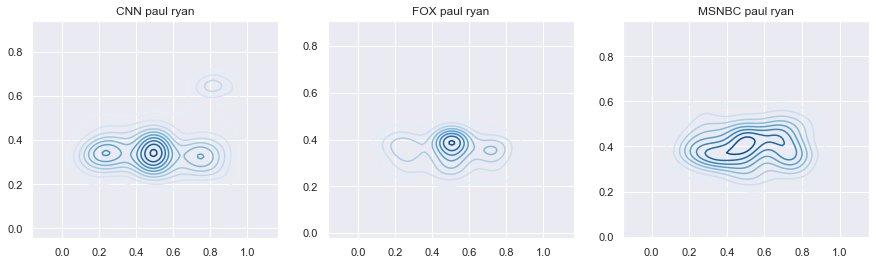

In [48]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
location_heat_map_person("CNN", "paul ryan");
plt.subplot(1,3,2)
location_heat_map_person("FOX", "paul ryan");
plt.subplot(1,3,3)
location_heat_map_person("MSNBC", "paul ryan");

In [50]:
def location_heat_map_person_topic(channel, person, topic):    
    all_files = glob.glob('processed_data/%s/*.p'%channel)
    locs = []
    for file in all_files:
        data = pickle.load(open(file, 'rb'))
        for key in data.keys():
            if topic in data[key]['Topics']:
                if data[key]['persons'] is None:
                    continue
                if person in data[key]['persons']:
                    if data[key]['locations'] is not None:
                        locs.extend(data[key]['locations'])
    locations = np.zeros((len(locs), 2))
    counter = 0
    for l in locs:
        locations[counter, 0] = (l[0] + l[2])/2
        locations[counter, 1] = (l[1] + l[3])/2
        counter += 1
    #idx = np.random.choice(len(locs), 5000)
    sns.kdeplot(locations, cmap="Blues")
    plt.title(channel + " " + person)
    return locations

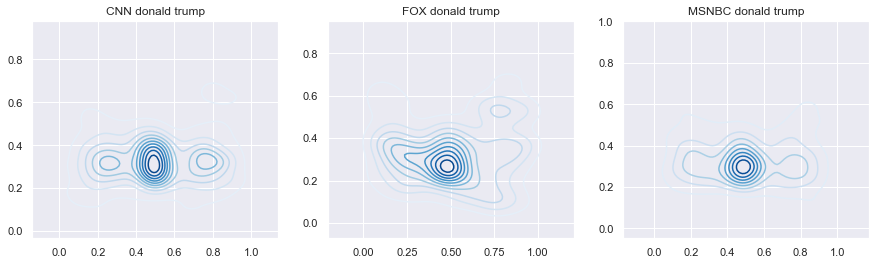

In [58]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
location_heat_map_person_topic("CNN", "donald trump", "Politics");
plt.subplot(1,3,2)
location_heat_map_person_topic("FOX", "donald trump", "Politics");
plt.subplot(1,3,3)
location_heat_map_person_topic("MSNBC", "donald trump", "Politics");

In [90]:
def location_heat_map_corner(channel, topic):    
    all_files = glob.glob('processed_data/%s/*.p'%channel)
    locs = []
    for file in all_files:
        data = pickle.load(open(file, 'rb'))
        for key in data.keys():
            if topic in data[key]['Topics']:
                if data[key]['locations'] is not None:
                    locs.extend(data[key]['locations'])
    locations = np.zeros((len(locs), 2))
    counter = 0
    for l in locs:
        locations[counter, 0] = (l[0] + l[2])/2
        locations[counter, 1] = (l[1] + l[3])/2
        counter += 1
    plt.figure(figsize=(4, 4))
    locations = locations[locations[:, 0] < 0.3]
    sns.kdeplot(locations, cmap="Blues", shade=True, shade_lowest=False)
    plt.title(channel + " " + topic)
    return locations

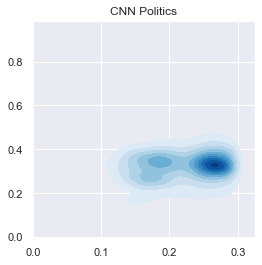

In [91]:
location_heat_map_corner('CNN', 'Politics');